In [1]:
# Import the pandas library and alias it as pd for easier referencing.
import pandas as pd

# Import the required libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required library for statistical analysis.
import scipy.stats as stats 

# Import the required function for chi-square test of independence.
from scipy.stats import chi2_contingency

# Import the required functions for ANOVA.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Import necessary modules from scikit-learn.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Import numpy for numerical operations.
import numpy as np

In [2]:
# Read the CSV file located at the specified path into a pandas DataFrame named 'df'
df = pd.read_csv('insurance.csv')

In [3]:
# Display the first few rows of the DataFrame df to get a quick overview of its contents.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display the last few rows of the DataFrame df to inspect the end of the dataset.
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Print the number of rows in the DataFrame df using the shape attribute (index 0).
# Print the number of columns in the DataFrame df using the shape attribute (index 1).
print('Rows:', df.shape[0], '\nColumns:', df.shape[1])

Rows: 1338 
Columns: 7


In [6]:
# Print the list of column names in the DataFrame df using the columns attribute and converting it to a list.
print('Column names:', df.columns.tolist())

Column names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [7]:
# Print the count of null values for each column in the DataFrame df by applying the isnull() method followed by the sum() method.
print('Null values:\n', df.isnull().sum())

Null values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# Print the count of unique values for each column in the DataFrame df using the nunique() method.
print('Unique values:\n', df.nunique())

Unique values:
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [9]:
# Display a concise summary of the DataFrame df including the column data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Convert the 'sex', 'smoker' and 'region' column in the DataFrame df to the 'category' data type.
df.sex = df['sex'].astype('category')
df.smoker = df['smoker'].astype('category')
df.region = df['region'].astype('category')

In [11]:
# Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the numerical columns in the DataFrame df.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**
1. Average Age of the primary beneficiary is 39.2 and the maximum age is 64.
2. Average BMI is 30.66 (out of normal range BMI), Maximum BMI is 53.13.
3. Average Medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770.
4. Median is less than mean in charges, indicating distribution is positively skewed.
5. Customer on an average has 1 child.

In [12]:
# Generate descriptive statistics for the categorical columns in the DataFrame df.
df.describe(include = 'category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
# Select columns of 'category' data type from the DataFrame df.
col = df.select_dtypes(['category']).columns 

# Iterate over each selected column and print the count of unique values using value_counts().
for i in range(len(col)):
    print(df[col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**Observations**
1. 676 male and 662 female, indicated sample has slightly more males than females.
2. 1064 nonsmoker and 274 smoker, indicating sample has more nonsmokers.
3. Number of claims from customer who reside in southwest region is more compared to other regions.

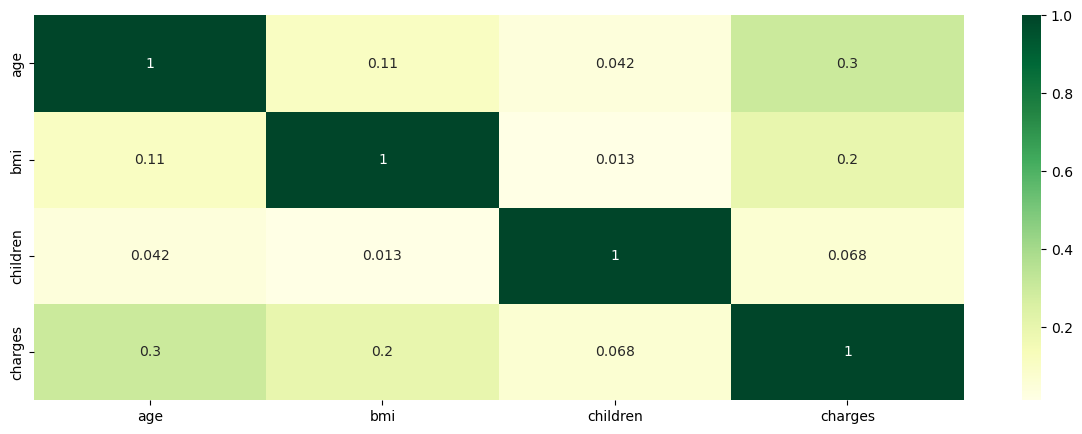

In [14]:
# Set the figure size for the heatmap.
plt.figure(figsize = (15, 5))

# Generate a heatmap of the correlation matrix for the numerical columns in the DataFrame df.
sns.heatmap(df.corr(), annot = True, cmap = 'YlGn')

# Display the heatmap.
plt.show()

**Observations**
1. There is very little significant correlation between charges - age and charges - bmi

# Statistical Analysis

## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

In [15]:
# Filter the DataFrame 'df' to include only rows where the 'smoker' column has the value 'yes'.
smoker = df.loc[df.smoker == 'yes']

In [16]:
# Display the first few rows of the filtered DataFrame.
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [17]:
# Count the number of non-null values for each column in the filtered DataFrame 'smoker'.
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

In [18]:
# Filter the DataFrame df to include only rows where the 'smoker' column has the value 'no'.
non_smoker = df.loc[df.smoker == 'no']

# Display the first few rows of the filtered DataFrame.
non_smoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [19]:
# Count the number of non-null values for each column in the filtered DataFrame 'non_smoker'.
non_smoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
charges     1064
dtype: int64

In [20]:
# Extract the 'charges' column from the filtered DataFrame 'smoker' and assign it to the variable 'charges_yes'.
charges_yes = smoker.charges

# Extract the 'charges' column from the filtered DataFrame 'non_smoker' and assign it to the variable 'charges_no'.
charges_no = non_smoker.charges

In [21]:
# Print the average insurance charges for smokers and non-smokers using the mean() method on the respective 'charges' columns.
print('Average cost charges to insurance for smoker is {} and non-smoker is {}'.format(charges_yes.mean(), charges_no.mean()))

Average cost charges to insurance for smoker is 32050.23183153285 and non-smoker is 8434.268297856199


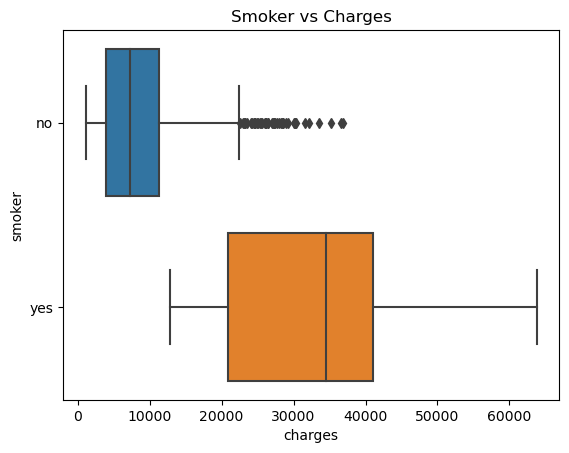

In [22]:
# Create a boxplot comparing the distribution of 'charges' for smokers and non-smokers.
# Set the 'charges' column as the x-axis, 'smoker' column as the y-axis, and use data from the DataFrame df.
# Set the title of the plot.
sns.boxplot(x = df.charges, y = df.smoker, data = df).set(title = 'Smoker vs Charges');

### Performing an independent two-sample t-test to compare the means of 'charges' for smokers and non-smokers.

In [23]:
# Set the significance level.
alpha = 0.05

# Get the t-statistic and p-value.
t_statistic, p_value = stats.ttest_ind(charges_yes, charges_no)

# Calculate the one-tailed p-value for a directional hypothesis test.
p_value_onetail = p_value / 2

In [24]:
# Print the test statistic, p-value, and one-tailed p-value.
print('Test statistic = {}, p-value = {}, one tail p-value = {}'.format(t_statistic, p_value, p_value_onetail))

Test statistic = 46.66492117272371, p-value = 8.271435842179102e-283, one tail p-value = 4.135717921089551e-283


In [25]:
# Check if the p-value is less than the significance level alpha.
if p_value < alpha:
    print('Conclusion: Since P value {} is less than alpha {}'.format(p_value_onetail, alpha))
    print('Reject null hypothesis that average charges for smokers are less than or equal to nonsmoker.')
else:
    print('Conclusion: Since P value {} is greater than alpha {}'.format(p_value_onetail, alpha))
    print('Failed to reject null hypothesis that average charges for smokers are less than nonsmoker')

Conclusion: Since P value 4.135717921089551e-283 is less than alpha 0.05
Reject null hypothesis that average charges for smokers are less than or equal to nonsmoker.


**Observation**
1. We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke.

## Prove (or disprove) with statistical evidence that the BMI of females is differnt from that of males?

In [26]:
# Filter the DataFrame df to include only rows where the 'sex' column has the value 'male'.
df_male = df.loc[df.sex == 'male']

# Filter the DataFrame df to include only rows where the 'sex' column has the value 'female'.
df_female = df.loc[df.sex == 'female']

In [27]:
# Extract the 'bmi' column from the filtered DataFrame 'df_female' and assign it to the variable 'bmi_female'.
bmi_female = df_female.bmi

# Extract the 'bmi' column from the filtered DataFrame 'df_male' and assign it to the variable 'bmi_male'.
bmi_male = df_male.bmi

In [28]:
# Print the mean BMI for females & males.
display(df_female.bmi.mean(), df_male.bmi.mean())

30.377749244713023

30.943128698224832

### Performing an independent two-sample t-test to compare the means of BMI for males and females.

In [29]:
# Set the significance level.
alpha = 0.05

# Get the t-statistic and p-value.
t_statistic, p_value = stats.ttest_ind(bmi_male, bmi_female)

# Calculate the one-tailed p-value for a directional hypothesis test.
p_value_onetail = p_value / 2

In [30]:
# Print the test statistic, p-value, and one-tailed p-value.
print('Test statistic = {}, p-value = {}, one tail p-value = {}'.format(t_statistic, p_value, p_value_onetail))

Test statistic = 1.696752635752224, p-value = 0.08997637178984932, one tail p-value = 0.04498818589492466


In [31]:
# Check if the p-value is less than the significance level alpha.
if p_value < alpha:
    print("Conclusion:Since P value {} is less than alpha {} ".format(p_value, alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")
else:
    print("Conclusion:Since P value {} is greater than alpha {} ".format(p_value, alpha))
    print("Failed to Reject Null Hypothesis that there is difference in bmi of men and bmi of female .")

Conclusion:Since P value 0.08997637178984932 is greater than alpha 0.05 
Failed to Reject Null Hypothesis that there is difference in bmi of men and bmi of female .


**Observation**
1. We fail to reject the null hypothesis and can conclude that there is no difference between BMI of female and BMI of male.

## Is the proportion of smokers significantly different across differnet regions?

In [32]:
# Create a contingency table using the crosstab function to display the counts of smokers and non-smokers in each region.
contigency = pd.crosstab(df.region, df.smoker)

In [33]:
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


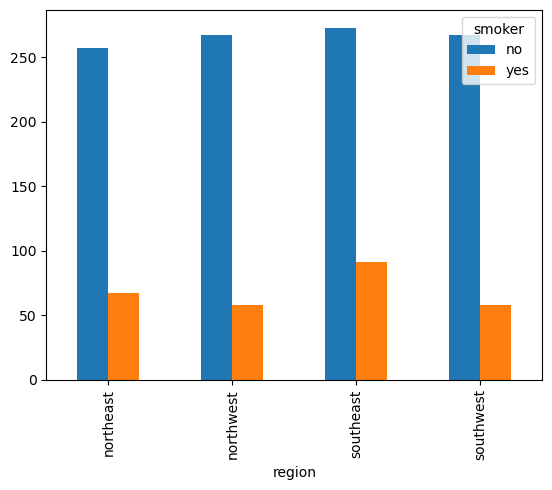

In [34]:
# Plot the contingency table as a bar plot to visualize the counts of smokers and non-smokers in each region.
contigency.plot(kind = 'bar');

### Performing the chi-square test of independence on the contingency table.

In [35]:
# Get the chi-square statistic, p-value, degrees of freedom, and expected frequencies.
chi, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)

# Print the results.
print('chi-square statistic: {}, \npvalue: {}, \ndegree of freedom: {}, \nexpected frequencies:\n {}'.format(chi, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071, 
pvalue: 0.06171954839170541, 
degree of freedom: 3, 
expected frequencies:
 [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]]


In [36]:
# Check if the p-value is less than 0.05.
if pval < 0.5:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


**Observation**
1. We failed to reject the null hypothesis and conclude that Smoker proportions is not significantly different across different regions.

## Is the mean BMI of women with no children, on child, and two children the same?

In [37]:
# Filter the DataFrame df_female to include only rows where the 'children' column has a value less than or equal to 2.
df_female_child = df_female.loc[df_female['children'] <= 2]

In [38]:
# Display the first few rows of the filtered DataFrame.
df_female_child.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [39]:
# Group the filtered DataFrame df_female_child by the number of children and calculate the mean BMI for each group.
df_female_child.groupby([df_female_child.children]).mean().bmi

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

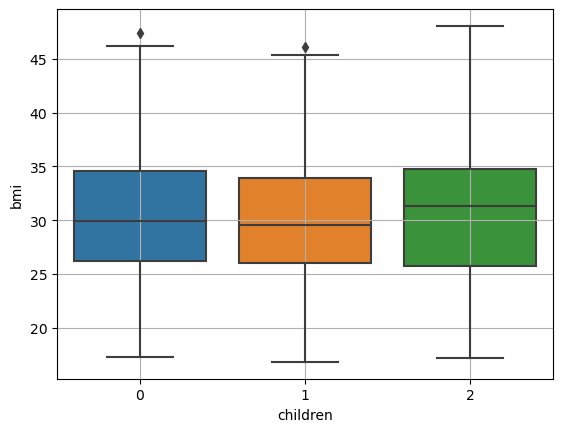

In [40]:
# Create a boxplot to visualize the distribution of BMI for different numbers of children among females.
sns.boxplot(x = 'children', y = 'bmi', data = df_female_child)

# Add gridlines to the plot.
plt.grid()

# Display the plot.
plt.show()

### Performing the ANOVA test

In [41]:
# Define the ANOVA model with the formula.
formula = 'bmi ~ C(children)'

# Fit the model to the data.
model = ols(formula, df_female_child).fit()

# Perform ANOVA and generate the ANOVA table.
anova_table = anova_lm(model)

# Display the ANOVA table.
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


P value is 0.715 and it is greater than alpha (0.05). We failed to reject the null hypothesis and conclude that mean BMI of women with no children, one children, two children is same.

# Linear Regression Modelling

In [42]:
# Replace 'yes' and 'no' values in the 'smoker' column with 1 and 0, respectively.
df['smoker'] = df['smoker'].replace(['yes', 'no'], [1, 0])

# Replace 'male' and 'female' values in the 'sex' column with 1 and 0, respectively.
df['sex'] = df['sex'].replace(['male', 'female'], [1, 0])

# Create a new binary column 'region_southeast' indicating whether the region is 'southeast' or not.
df['region_southeast'] = df['region'].apply(lambda x: 1 if x == 'southeast' else 0)

In [43]:
# Assign the target variable 'charges' to y_data.
y_data = df['charges']

# Assign the features (independent variables) to x_data, dropping 'charges' and 'region' columns.
x_data = df.drop(['charges', 'region'], axis = 1)

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25)

In [44]:
# Instantiate a Linear Regression model.
model1 = LinearRegression()

# Fit the model to the training data.
model1.fit(x_train, y_train)

# Make predictions on the test data.
y_pred = model1.predict(x_test)

In [45]:
# Create a DataFrame to store the coefficients of the features and the intercept.
model_coef = pd.DataFrame(data = model1.coef_, index = x_test.columns)

# Add the intercept to the DataFrame.
model_coef.loc['intercept', 0] = model1.intercept_

# Display the coefficients.
display(model_coef)

,0
age,238.442918
sex,90.925170
bmi,333.665903
children,527.570206
smoker,24071.358224
region_southeast,-322.285546
intercept,-11675.718230


In [46]:
# Create a DataFrame to store the model performance metrics.
model_performance = pd.DataFrame(data = [r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))], index = ['R2', 'RMSE'])

# Display the model performance metrics.
display(model_performance)

,0
R2,0.738379
RMSE,5941.018711


**Observations**
1. Smoking is a huge factor as compared to other features. Just by being a smoker, the charge increases by approximately 25,000 regardless of age. Thereafter, the charges increases with age, bmi(higher health risk) and children (insurance is increasingly important with dependants).

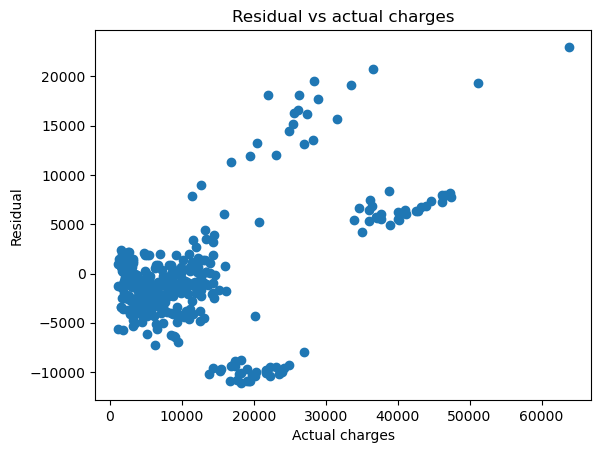

In [47]:
# Calculate the residuals.
residual = y_test - y_pred

# Create a scatter plot of residuals against actual charges.
plt.scatter(y_test, residual)
plt.title('Residual vs actual charges')
plt.xlabel('Actual charges');
plt.ylabel('Residual');

Positive residual means that the actual charge > predicted charge
Negative residual means that the actual charge < predicted charge

**Observation**
1. The model is great for charges less than 15,000 as the residual is within 5000. However, the model breaks down at higher charge (> 15,000) as the residual very significant. The model could over predict the actual charge by 10,000 or more, or under predict the actual charge by minimally 5,000.